In [1]:
import pdb,sys,os
import warnings
warnings.filterwarnings('ignore')
import anndata
import scanpy as sc
sc.settings.verbosity = 0
import argparse
import copy
import numpy as np
import scipy
import timeit

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from typing import Tuple

In [2]:
import scSemiProfiler as semi
from scSemiProfiler.utils import *

## Single-cell deconvolution pipeline
This example is for the scenario where the users wish to use scSemiProfiler to deconvolution bulk data of a target sample to single-cell data, providing the bulk and single-cell of reference data. The input format is the same as before. Bulk data of representatives and target samples to deconvolute need to be concatenated together as an h5ad file. Sample IDs should be stored in adata.obs['sample_ids'] and gene names should be stored in adata.var.index. The single-cell reference data is also provided as an h5ad file as the representative before. The model reconstructs the reference and then use tgtinfer function to infer the single-cell data of any target sample. Once target sample's single-cell data is generated, the user can annotate the cell type in various ways, e.g. de novo cell type annotation using any tool. Here we train a classifier using the reference data and then annotate the generated target sample using the classifier. 


## Step 1: Initial setup: bulk data preparation and reference sample specification

In [3]:
# 'bulkdata.h5ad' contains the reference data and the target bulk data to deconvolute

name = 'deconvolution_example'
bulk = 'example_data/bulkdata.h5ad' 
logged = False
normed = True
geneselection = False
batch = 2

In [4]:
# run the same initial setup
semi.initsetup(name,bulk,logged=logged,normed=normed,geneselection=geneselection,batch=batch)

Start initial setup
Initial setup finished. Among 12 total samples, selected 2 representatives:
BGCV09_CV0279
MH9143426


In [5]:
# view bulk samples

bulkdata = anndata.read_h5ad(bulk)
for i, sid in enumerate(bulkdata.obs['sample_ids']):
    print(i,sid)

0 AP8
1 BGCV02_CV0068
2 BGCV03_CV0084
3 BGCV03_CV0176
4 BGCV04_CV0164
5 BGCV07_CV0137
6 BGCV09_CV0279
7 MH8919226
8 MH8919227
9 MH9143322
10 MH9143426
11 newcastle20


In [4]:
# select 6 as reference data, setup representative and obtain representative single-cell data

set_representatives(name=name, representatives_list = [6])

## Step 2: Reference data processing

In [6]:
# provide reference single-cell data at 'name/representative_sc.h5ad'

# for this example we use this function to acquire data.
semi.get_eg_representatives(name)

Obtained single-cell data for representatives.


In [7]:
# single-cell processing of the reference data
semi.scprocess(name=name,singlecell=name+'/representative_sc.h5ad',normed=True,logged=False,cellfilter=False,threshold=1e-3,geneset=True,weight=0.5,k=15)

Processing representative single-cell data
Removing background noise
Computing human geneset scores
GMT file c2.cp.v7.4.symbols.gmt loading ... 
2922
Number of genes in c2.cp.v7.4.symbols.gmt 4240
Augmenting and saving single-cell data.
Finished processing representative single-cell data


## Step 3: Infer target sample single-cell data

In [8]:
# use the reference data to infer the target single-cell data
# e.g. infer sample 1's single-cell

semi.tgtinfer(name = name, representative = 6, target = 1, bulktype='pseudobulk')


pretrain 1: representative reconstruction
INFO     Generating sequential column names                                                                        


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A16') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]


Epoch 100/100: 100%|██████████████| 100/100 [00:52<00:00,  1.94it/s, v_num=1, train_loss_step=427, train_loss_epoch=418]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████████| 100/100 [00:52<00:00,  1.90it/s, v_num=1, train_loss_step=427, train_loss_epoch=418]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A16') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]



Epoch 300/300: 100%|██████████████| 300/300 [02:00<00:00,  2.49it/s, v_num=1, train_loss_step=369, train_loss_epoch=379]

`Trainer.fit` stopped: `max_epochs=300` reached.


Epoch 300/300: 100%|██████████████| 300/300 [02:00<00:00,  2.49it/s, v_num=1, train_loss_step=369, train_loss_epoch=379]
pretrain2: reconstruction with representative bulk loss
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A16') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]


Epoch 50/50: 100%|██████████████████| 50/50 [00:27<00:00,  1.81it/s, v_num=1, train_loss_step=337, train_loss_epoch=343]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████████████| 50/50 [00:27<00:00,  1.80it/s, v_num=1, train_loss_step=337, train_loss_epoch=343]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A16') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]



Epoch 150/150: 100%|██████████████| 150/150 [01:03<00:00,  2.75it/s, v_num=1, train_loss_step=359, train_loss_epoch=355]

`Trainer.fit` stopped: `max_epochs=150` reached.


Epoch 150/150: 100%|██████████████| 150/150 [01:03<00:00,  2.37it/s, v_num=1, train_loss_step=359, train_loss_epoch=355]
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A16') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]


Epoch 150/150: 100%|██████████████| 150/150 [00:46<00:00,  3.26it/s, v_num=1, train_loss_step=357, train_loss_epoch=357]

`Trainer.fit` stopped: `max_epochs=150` reached.


Epoch 150/150: 100%|██████████████| 150/150 [00:46<00:00,  3.26it/s, v_num=1, train_loss_step=357, train_loss_epoch=357]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A16') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]


Epoch 150/150: 100%|██████████████| 150/150 [00:46<00:00,  3.25it/s, v_num=1, train_loss_step=363, train_loss_epoch=363]

`Trainer.fit` stopped: `max_epochs=150` reached.


Epoch 150/150: 100%|██████████████| 150/150 [00:46<00:00,  3.25it/s, v_num=1, train_loss_step=363, train_loss_epoch=363]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A16') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]


Epoch 150/150: 100%|██████████████| 150/150 [00:46<00:00,  3.26it/s, v_num=1, train_loss_step=368, train_loss_epoch=368]

`Trainer.fit` stopped: `max_epochs=150` reached.


Epoch 150/150: 100%|██████████████| 150/150 [00:46<00:00,  3.25it/s, v_num=1, train_loss_step=368, train_loss_epoch=368]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A16') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]


Epoch 150/150: 100%|██████████████| 150/150 [00:45<00:00,  3.26it/s, v_num=1, train_loss_step=374, train_loss_epoch=374]

`Trainer.fit` stopped: `max_epochs=150` reached.


Epoch 150/150: 100%|██████████████| 150/150 [00:45<00:00,  3.26it/s, v_num=1, train_loss_step=374, train_loss_epoch=374]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A16') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]


Epoch 150/150: 100%|██████████████| 150/150 [00:45<00:00,  3.27it/s, v_num=1, train_loss_step=377, train_loss_epoch=377]

`Trainer.fit` stopped: `max_epochs=150` reached.


Epoch 150/150: 100%|██████████████| 150/150 [00:45<00:00,  3.26it/s, v_num=1, train_loss_step=377, train_loss_epoch=377]
Finished target sample single-cell inference


INFO     Generating sequential column names                                                                        


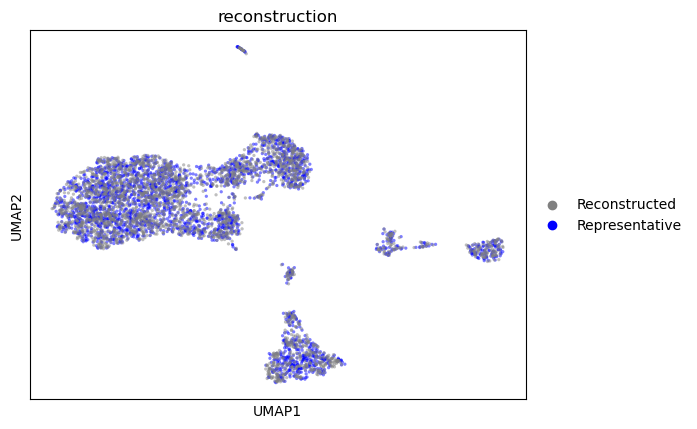

In [36]:
visualize_recon(name, 6)

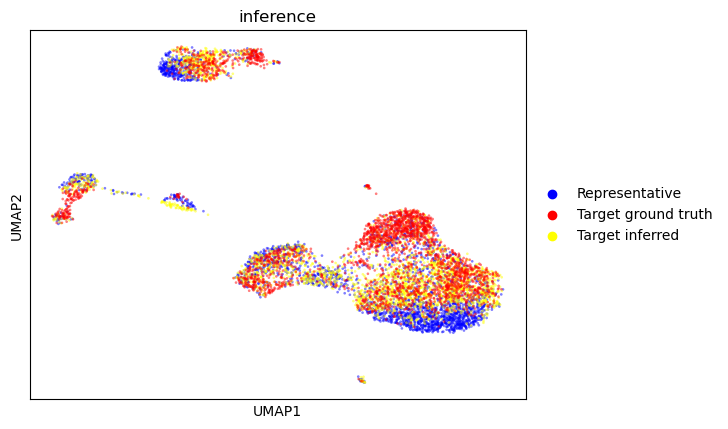

In [40]:
# check the inference performance

visualize_inferred(name=name, target=1,  representatives=[6], cluster_labels = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) # only 1 representative, so in cluster_label all targets have representative No.0

After inference, a cell-by-gene matrix for the target sample will be stored in 'name/inferreddata/reference_to_target.npy'. We convert it to h5ad for downstream task - cell type annotation.

In [10]:
# list inferred target sample:
os.listdir(name + '/inferreddata')

['BGCV09_CV0279_to_BGCV02_CV0068.npy']

In [12]:
# convert to anndata object
tgt_mtx = np.load(name + '/inferreddata/BGCV09_CV0279_to_BGCV02_CV0068.npy')
tgtdata = anndata.AnnData(tgt_mtx)
tgtdata.var.index = bulkdata.var.index # add gene names

## Step 4: Cell type annotation for target single-cell data

### Option 1: De novo annotation
The user can choose any existing methods to annotate the generated single-cell matrix, for example:
[Cellar](https://github.com/euxhenh/cellar) or [Scanpy](https://scanpy.readthedocs.io/en/stable/tutorials/basics/clustering.html#dimensionality-reduction) (note: The data is already preprocessed. Please start from the 'dimensionality-reduction' step.)


### Option 2: Annotate using a classifier trained on reference samples
We can train a classifier usign the reference samples and use it to annotate the target sample.

In [21]:
# get training data
scdata = anndata.read_h5ad(name + '/representative_sc.h5ad')
reference_x = np.log1p(scdata.X)
reference_y = np.array(scdata.obs['celltypes']) # reference data cell types

In [23]:
# get target expression data
target_x = np.log1p(tgtdata.X)

Train a sklearn MLP classifier. Feel free to choose any other models that you believe work better.

In [25]:
annotator = MLPClassifier(hidden_layer_sizes=(200,))

print('Training cell type annotator.')
st =  timeit.default_timer()
#annotator = MLPClassifier(hidden_layer_sizes=(200,)) 
annotator.fit((reference_x),reference_y)
ed =  timeit.default_timer()
print('Finished. Cost ' + str(ed-st) + ' seconds.')

Training cell type annotator.
Finished. Cost 75.04079421889037 seconds.


### Get predicted cell type and compare with the ground truth

In [26]:
predicted_celltype = annotator.predict(target_x)

In [27]:
tgtdata.obs['celltypes'] = predicted_celltype

In [35]:
totaltypes = np.unique(reference_y)
real_prop = celltype_proportion(scdata,totaltypes)
tgt_prop = celltype_proportion(tgtdata,totaltypes)

print('ground truth and predicted cell type proportion comparison')
print('CCC:',CCCscore(real_prop,tgt_prop))
print('Pearson correlation:',scipy.stats.pearsonr(real_prop,tgt_prop))
print('RMSE:',RMSE(real_prop,tgt_prop))


ground truth and predicted cell type proportion comparison
CCC: 0.9875996401037704
Pearson correlation: PearsonRResult(statistic=0.9946967172114376, pvalue=3.103562672461389e-16)
RMSE: 0.017659669657844133
